In [1]:
# This cell is used to change parameter of the rise slideshow, 
# such as the window width/height and enabling a scroll bar

from notebook.services.config import ConfigManager
cm = ConfigManager()
cm.update('livereveal', {
              'width': 1000,
              'height': 800,
              'scroll': True,
})

{'width': 1000, 'height': 800, 'scroll': True}

# Week 4 - Feature Extraction and Learning

## Aims of the Session

* Understand how images are converted into a set of features used for machine learning purposes

* Understand the basic notions before applying algorithms to classify different types of problems

## Resources for the Lecture

### Websites

* https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_feature2d/py_features_meaning/py_features_meaning.html#exercises
* https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_feature2d/py_features_harris/py_features_harris.html
* https://stackoverflow.com/questions/35854197/how-to-use-opencvs-connected-components-with-stats-in-python/py_features_harris.html
* https://en.wikipedia.org/wiki/Histogram_of_oriented_gradients
* https://www.learnopencv.com/histogram-of-oriented-gradients/
* https://towardsdatascience.com/understanding-the-different-types-of-machine-learning-models-9c47350bb68a
* https://towardsdatascience.com/train-validation-and-test-sets-72cb40cba9e7
* https://en.wikipedia.org/wiki/Viola%E2%80%93Jones_object_detection_framework
* https://realpython.com/traditional-face-detection-python/
* https://github.com/opencv/opencv/tree/master/data/haarcascades

### Papers

* C. Harris and M. Stephens, “A Combined Corner and Edge Detector,” Alvey Vision Conference, 1988.
* N. Dalal and B. Triggs, “Histograms of oriented gradients for human detection,” Computer Vision and Pattern Recognition, vol. I, pp. 886–893, 2005.
* D. G. Lowe, “Object recognition from local scale-invariant features,” International Conference on Computer Vision (ICCV), vol. 2, no. 8, pp. 1150–1157, 1999.
* H. Bay, T. Tuytelaars, and L. Van Gool, “SURF: Speeded up robust features,” Lecture Notes in Artificial Intelligence, vol. 3951, pp. 404–417, 2006.

## Features

Features are the most important component of data science

Think about any data science problem that you have faced so far

You have to analyse a series of data records/entries, each possessing a fixed amount of attributes to describe them 

![Fig. 1. An example of data](https://www.dropbox.com/s/rpwcnj7fzygsfdr/data.jpg?raw=1)

### Features in images

How do you assemble a jigsaw puzzle?

![Fig. 2. Jigsaw](https://www.dropbox.com/s/659ta4spioz8pea/jigsaw.jpg?raw=1)

Can we project the same logic to the computer?

Can we project the same logic to data science as a whole?

### Pattern Recognition

The computer will look for specific **patterns** which are 
    - unique
    - easy to track
    - easy to compare

Which are the **best** features to do so!

Take a look at this image and find the features:

![Fig. 3. Find the features](https://www.dropbox.com/s/nvizljjmuh204ul/feature_building.jpg?raw=1)

* A and B are flat surfaces and difficult to find as an exact match

* C and D are simpler (edges of the building), however their exact location is difficult to find

* E and F are corners of the building, and can be easily found based on their **patch**

Taking a simpler example you can see that **corners** are usually the most intuitive **structural features**

![Fig. 4. Simple example of feature detection](https://www.dropbox.com/s/w3wxoqkd4mfzii5/feature_simple.jpg?raw=1)

There are other good features, such as blobs, changes of intensity, etc.

### Pixels as features

The most basic features in an image

Like atoms for matter!

An image is converted into a **vector** where each column represents a feature (pixel intensity)

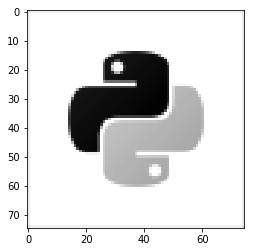

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
img = cv2.imread('data/logo.png', 0)
plt.imshow(img,'gray')

Now we need to `flatten` the image so that it is represented as a vector

In [3]:
print("Shape of original image: ", img.shape)
img_vector = img.flatten()
print("Flattened image: ", img_vector)
print("Shape of flattened image. ", img_vector.shape)

Shape of original image:  (75, 75)
Flattened image:  [234 246 246 ... 246 246 234]
Shape of flattened image.  (5625,)


As more images get imported, we can create an **image repository** by appending new images into a `numpy` array

(75, 75)


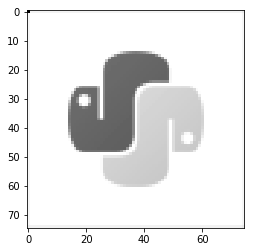

In [4]:
# creating a variable to store the dataset
repo = img_vector.copy()
# Importing and showing a new image
img2 = cv2.imread('data/logotrans.png', 0)
plt.imshow(img2,'gray')
print(img2.shape)

In [5]:
# Flattening the second image
img_vector2 = img2.flatten()
# stacking the second vector created into our repository
repo = np.vstack((repo,img_vector2))
# Printing the repo
print('Image repo: ',repo)
print('Shape of image repo: ', repo.shape)

Image repo:  [[234 246 246 ... 246 246 234]
 [  0 243 243 ... 242 242 234]]
Shape of image repo:  (2, 5625)


Notice that we can append more images to create a larger repository

However, if we intend to use this repository for **classification** purposes, then **all images should be of the same size**!

If a new image with a different size has to be added to `repo`, then we can use the `resize` function in `OpenCV`

(150, 150)


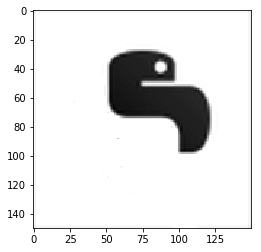

In [6]:
# Importing and showing a third image
img3 = cv2.imread('data/logoaltered.png', 0)
plt.imshow(img3,'gray')
print(img3.shape)

In [7]:
# Resizing the image
img3 = cv2.resize(img3, (75, 75))
print('New dimensions of the image: ', img3.shape)
# Flattening the third image
img_vector3 = img3.flatten()
# appending the third vector created
repo = np.vstack((repo,img_vector3))
# Printing the array
print(repo, repo.shape)

New dimensions of the image:  (75, 75)
[[234 246 246 ... 246 246 234]
 [  0 243 243 ... 242 242 234]
 [239 249 248 ... 248 249 239]] (3, 5625)


Sometimes is useful to **binarise** images prior to importing them to:
    - Reduce the values for the features
    - Increase quality/standardise samples

#### Issues with using pixels as features 

If a $75 \times 75$ image yielded $5'625$ features (pixels), imagine with larger images!

Moreover, not all pixels contain valuable information

This representation is typically not **rotation invariant** nor **structurally** representative of the images

Still, they are widely used in machine learning! **Why?!**

## Feature detection and extraction algorithms

### Harris Corners

This algorithm looks for changes on intensity from a pixel with respect to it's neighbours

This results on the algorithm being mostly capable of finding the corners of shapes

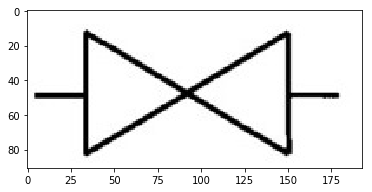

In [8]:
img = cv2.imread('data/symbol.jpg')
imggray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(imggray,'gray')

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


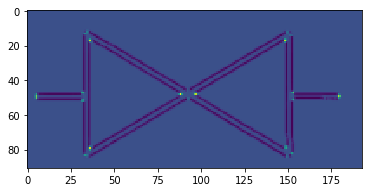

In [9]:
# Convert the grayscale image into float32 
# Harris Corners works better on this numeric data type
imggray = np.float32(imggray)
# Run the algorithm with some predefined parameters
dst = cv2.cornerHarris(imggray,2,3,0.04)
# Show the result (as an array and as an image)
print(dst)
plt.imshow(dst)

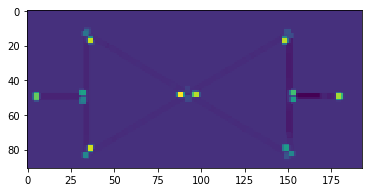

In [10]:
# The resulting image is dilated to better mark the corners
dst = cv2.dilate(dst,None)
plt.imshow(dst)

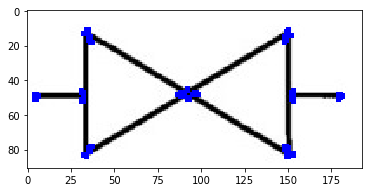

In [11]:
# Threshold for an optimal value to find the corners
img[dst>0.01*dst.max()]=[0,0,255]
# Show the final image
plt.imshow(img)

#### Feature detection $\neq$ feature extraction

* We have found an approximate location of the corners, but how useful is that for classification purposes?

* Suppose we have a repository of thousands of images to classify:
    * Could we train the classifier simply by entering the numerical values of the $(x,y)$ coordinates?

* We most likely need to extract some more useful **features**

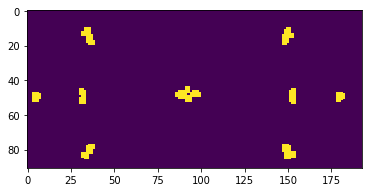

In [12]:
# The image is thresholded for the optimal value
_, dst = cv2.threshold(dst,0.01*dst.max(),255,0)
# Show the final image
plt.imshow(dst)

In [13]:
# find centroids and stats
# Centroids: (x,y) location of the corners
# Stats: 5 numbers that indicate the position of the centroid, width, height and area
dst = np.uint8(dst)
_, _, stats, centroids = cv2.connectedComponentsWithStats(dst)
print('Total number of corners found:', len(centroids))
print('Centroids found: ')
print(centroids)
print('Stats for each centroid found: ')
print(stats)

Total number of corners found: 10
Centroids found: 
[[ 96.06782325  44.92845084]
 [ 34.81632653  14.42857143]
 [149.45652174  14.43478261]
 [ 31.5         49.11764706]
 [ 91.93421053  48.01315789]
 [152.58823529  49.        ]
 [  4.77777778  49.44444444]
 [179.73076923  49.34615385]
 [ 34.76190476  80.97619048]
 [150.03846154  81.23076923]]
Stats for each centroid found: 
[[    0     0   193    91 17177]
 [   31    10     8    10    49]
 [  147    10     7    10    46]
 [   30    45     4     9    34]
 [   85    44    15     9    76]
 [  151    45     4     9    34]
 [    3    47     5     6    27]
 [  178    47     5     6    26]
 [   31    77     8     9    42]
 [  147    77     8     9    52]]


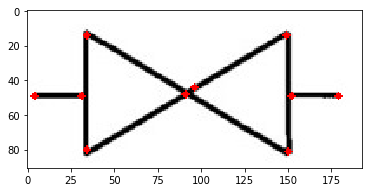

In [14]:
# Load the image in colour again to draw over it
img = cv2.imread('data/symbol.jpg')
# Draw circles wherever a corner (i.e. centroud) has been found
centroids = np.uint8(centroids)
for centroid in centroids:
    img = cv2.circle(img,tuple(centroid),int(img.shape[0]/40),(255,0,0), -1)
# Show the image
plt.imshow(img)

Now using the image or the centroids, we will create a **vector of features** that describes the image

In [15]:
## Creating a feature vector from the Harris Corners features extracted
print('Feature vector: ', stats.flatten())
print('Size of feature vector: ', stats.flatten().shape)

Feature vector:  [    0     0   193    91 17177    31    10     8    10    49   147    10
     7    10    46    30    45     4     9    34    85    44    15     9
    76   151    45     4     9    34     3    47     5     6    27   178
    47     5     6    26    31    77     8     9    42   147    77     8
     9    52]
Size of feature vector:  (50,)


#### The problem with Harris Corners in Machine Learning

If we work with a repository of images, it is most likely that each image obtains a different amount of corners

When we create our feature repository, it will be uneven as some images may have more features (i.e. columns) than others

**Solution:**Limit Harris Corners to find best $n$ features and only use those to build our data repository

Problem: Loss of data

**Solution 2:** We could also use Harris Corners just as the **detector** and then use another algorithm as the **feature extractor**

Problem: Incongruent!

### Histogram of Oriented Gradients (HOG)

The technique counts occurrences of gradient orientation in localised portions of an image

In simple terms: It converts a $64 \times 128 \times 3$ image into a **feature vector** of length $3780$

* Why this size?

![Fig. 5. HOG example](https://www.dropbox.com/s/aonf8kxg5fy36cg/HOG.jpg?raw=1)

* The method calculates the $x$ and $y$ gradients of the image, as well as the magnitude

* Then the image is divided in patches and the gradients are calculated

In [16]:
## Obtaining the HOG gradients of an image
from skimage import feature
class HOG:
    def __init__(self, orientations = 9, pixelsPerCell = (8, 8),
        cellsPerBlock = (2, 2), transform = False):
        self.orienations = orientations
        self.pixelsPerCell = pixelsPerCell
        self.cellsPerBlock = cellsPerBlock
        self.transform = transform
    def describe(self, image):
        hist = feature.hog(image, orientations = self.orienations,
            pixels_per_cell = self.pixelsPerCell,
            cells_per_block = self.cellsPerBlock,
            transform_sqrt = self.transform)
        return hist
img = cv2.imread('data/usain.jpg',0)
hog = HOG(orientations = 9, pixelsPerCell = (8, 8), cellsPerBlock = (2, 2), transform = True)
hist = hog.describe(img)
print('HOG Features for the image:')
print(hist)
print('Size of the HOG Features for the image:', hist.shape)

C:\Anaconda\lib\site-packages\dask\config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}


HOG Features for the image:
[0.13199286 0.03729767 0.1958527  ... 0.         0.         0.        ]
Size of the HOG Features for the image: (3780,)


C:\Anaconda\lib\site-packages\skimage\feature\_hog.py:150: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15. To supress this message specify explicitly the normalization method.
  skimage_deprecation)


Notice that in this case, we obtain a fixed-size feature vector provided that the input has the same size

Approaches like this are much better suited for machine learning compared to classical feature extractors such as Harris Corners). **WHY?**

Still, classical feature extractors are widely used since these are capable to represent **structure**

**HOW MANY MORE FEATURE EXTRACTORS EXIST??**

**MANY, MANY, MAAAAAAAAANY OTHERS!!!**

![Fig. 6. Different Feature Extractors](https://www.dropbox.com/s/nze09qcgocx5mv1/FEs.jpg?raw=1)

## Features for Face Recognition

The human face innately has features!
    - nose
    - eyes
    - etc

As humans, we use those features to recognise other individuals

Then why wouldn't a machine use them as well?!

One of the first and most famous frameworks for face detection was presented in 2001 by Paul Viola and Michael Jones, often referred to as the [Viola-Jones](https://en.wikipedia.org/wiki/Viola%E2%80%93Jones_object_detection_framework) object detection framework

It uses something called [Haar-like features](https://realpython.com/traditional-face-detection-python/) to detect edges (1 and 2), lines (3) and diagonals (4)
![Fig. 7. Haar-like features](https://www.dropbox.com/s/hijnqhik9jll6l3/haar.png?raw=1)

It turns out that when overlapping these features in a human face, it can help us detect areas of interest

For example, *mask* (2) can help us identify the area with the eyes
![Fig. 8. Eye detection](https://www.dropbox.com/s/u70jfji3h9svq0k/haareyes.png?raw=1)

Conversely, *mask* (3) can help us find the nose
![Fig. 9. Nose detection](https://www.dropbox.com/s/z70sno7xfckidat/haarnose.png?raw=1)

A simple classifier would right away deduct that, if there are eyes and nose, then there must be a face!

This is the algorithm most commonly used in commercial cameras (it is fast and easy to use)

It is also why faces in statues and paintings get recognised!

It would take me a whole module to explain all the details of this method, the only thing you need to know is that it is an **end-to-end one**, this means that authors not only proposed the feature extraction, but also the classifier!

In this case, they use a **cascading classifier** (you will sometimes find this in literature as Haar cascade)
![Fig. 10. Basics of a cascade classifier](https://www.dropbox.com/s/z98smtkkndyk0yq/cascade.png?raw=1)

This can get more complex (but also more robust) as more classifiers are used
![Fig. 11. Full cascade classifier](https://www.dropbox.com/s/ndz2mvq3xp09jol/haarcascade.png?raw=1)

`OpenCV` comes with a ready to use Haar cascade!

First, we need to import an image

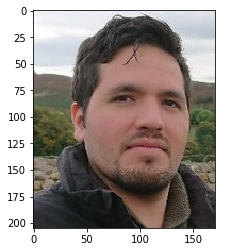

In [17]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
# Read image
original_image = cv2.imread('data/nomask.jpg')
# show converted because cv uses BGR, not RGB
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))

Then, we convert the image to grayscale so that we can apply the Viola-Jones method

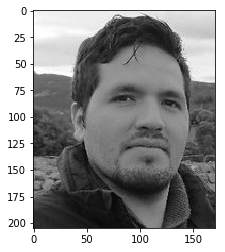

In [18]:
# Convert color image to grayscale for Viola-Jones
grayscale_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)
# We use "gray" to specify to plt.imshow that the image is grayscale
plt.imshow(grayscale_image, 'gray')

Then, we download the **frontalface** .xml model from [Github](https://github.com/opencv/opencv/tree/master/data/haarcascades), load it here and use it to process the image using the `detectMultiScale` function

In [19]:
# Load the classifier and create a cascade object for face detection
face_cascade = cv2.CascadeClassifier('data/haarcascade_frontalface_alt.xml')
# Detect faces
detected_faces = face_cascade.detectMultiScale(grayscale_image)
print(detected_faces)

[[ 54  43 107 107]]


Notice that we get four numbers! These are the coordinates where the face is found.

We can do a method to "draw" green rectangles over the faces as follows:

In [20]:
# Put rectangles in the images
for (column, row, width, height) in detected_faces:
    cv2.rectangle(original_image,(column, row),
        (column + width, row + height),
        (0, 255, 0),2)

Finally, we show the original image with the rectangle

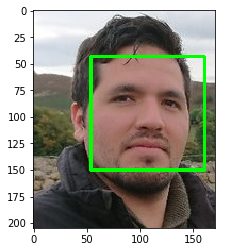

In [21]:
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))

Do you think this works with a facemask?
![Fig. 12. Facemask example 1](https://www.dropbox.com/s/hu4idfcm07xk528/facemask.jpg?raw=1)

[[ 146  383  186  186]
 [ 310  198  154  154]
 [1138  192  203  203]
 [ 788  323  215  215]]


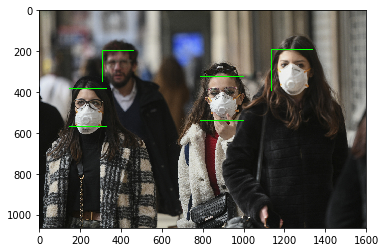

In [22]:
original_image = cv2.imread('data/facemask.jpg')
grayscale_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)
face_cascade = cv2.CascadeClassifier('data/haarcascade_frontalface_alt.xml')
detected_faces = face_cascade.detectMultiScale(grayscale_image)
print(detected_faces)
for (column, row, width, height) in detected_faces:
    cv2.rectangle(original_image,(column, row),
        (column + width, row + height),
        (0, 255, 0),2)
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))

How about now?
![Fig. 13. Facemask example 2](https://www.dropbox.com/s/594o736z80aauxm/facemask2.jpg?raw=1)

()


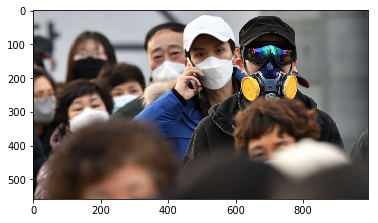

In [23]:
original_image = cv2.imread('data/facemask2.jpg')
grayscale_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)
face_cascade = cv2.CascadeClassifier('data/haarcascade_frontalface_alt.xml')
detected_faces = face_cascade.detectMultiScale(grayscale_image)
print(detected_faces)
for (column, row, width, height) in detected_faces:
    cv2.rectangle(original_image,(column, row),
        (column + width, row + height),
        (0, 255, 0),2)
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))

## Tutorial: How to create your "original" image repository

## Machine Learning

Now that we understand how to produce features, we can input them into a **machine learning model**

Machine learning: An automatic function that maps $x \rightarrow y$ based on the input data

![Fig. 14. Fundamentals of Machine Learning](https://www.dropbox.com/s/shrjabuib4m7nf5/ml.jpg?raw=1)

### Types of Machine Learning

#### Supervised Learning

* Aims to learn a function that, given a sample of data and desired outputs, approximates a function that maps inputs to output

* Done in the context of **classification** (when mapping input to output label) or **regression** (when mapping input to continuous output)

* The "correct" output will be deduced from the `training` data, therefore the model requires a reliable base

##### Examples of Supervised Learning Algorithms

* Linear/logistic Regression

* Naive Bayes Classifier

* Support Vector Machine (SVM)

* Decision Tree/Random Forest

* Artificial Neural Network (ANN)

#### Semi-supervised Learning

Aims to label unlabelled data points using knowledge learned from a small number of labelled data points

Learning with both unlabelled and labeled data points

Used when large amounts of data are costly to label

##### Assumptions of Semi-supervised Learning

`Continuity`: Data points that are "close" have a common label

`Cluster`: Data naturally forms discrete clusters, most common to share label

`Manifold`: Data lies in a lower dimensional space than the input space

##### Examples of Semi-supervised Learning Algorithms

Transductive SVM

Label Propagation

#### Unsupervised Learning

Does not have (or need) any labelled outputs, so its goal is to infer the natural structure present within a set of data points

Finds inherent patterns of data

Most common tasks: **clustering** and **exploratory data analysis**

##### Examples of Unsupervised Learning Algorithms

Principal Component Analysis (PCA)

Autoencoders

K-means clustering

### Splitting Data for Classification

Before testing all of these methods, it is important to split the data into sets

* This will help us understand the performance of the model prior to its deployment

Data is usually split into `training`, `testing` and `validation` data

**Training:** The samples used to fit the model

**Validation:** Provide an unbiased evaluation of the model while tuning hyperparameter, as skill of this validation is incorporated in the model

**Testing:** Provide an unbiased evaluation of a final model

![Fig. 15. Typical Data Split](https://www.dropbox.com/s/oze1q3wj7d71pa1/traintestvalid.jpg?raw=1)

#### How to Split your Data (recommendations)

Depends on two things: **total number of samples** and **type of model trained**

Some models (e.g. ANN) need substantial training data

They also have more hyperparameters, so you need to consider a larger validation set

**Make sure that all labels are represented in each set!**

## LAB 4: "FEATURE" BASED DATA CLASSIFICATION